In [2]:
import os
import pandas as pd
import requests

# 获取数据
PATH = './'
# r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

# with open(PATH + 'iris.data', 'w') as f:
#     f.write(r.text)

# os.chdir(PATH)
df = pd.read_csv(PATH + 'iris.data', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [19]:
# df['sepal length']
df.ix[:3, :2]

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [20]:
df.ix[:3, [x for x in df.columns if 'width' in x]]

,sepal width,petal width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2


In [17]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
df[df['class']=='Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [31]:
# virginica = df[df['class']=='Iris-virginica'].reset_index(drop=True)
# virginica
df[(df['class'] == 'Iris-virginica') & (df['petal width'] > 2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [34]:
df.describe(percentiles=[.20, .40, .80, .90, .95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
20%,5.000000,2.700000,1.500000,0.200000
40%,5.600000,3.000000,3.900000,1.160000
50%,5.800000,3.000000,4.350000,1.300000
80%,6.520000,3.400000,5.320000,1.900000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000


In [37]:
# df.corr(method='spearman')
df.corr(method='kendall')

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.072112,0.717624,0.654960
sepal width,-0.072112,1.000000,-0.182391,-0.146988
petal length,0.717624,-0.182391,1.000000,0.803014
petal width,0.654960,-0.146988,0.803014,1.000000


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

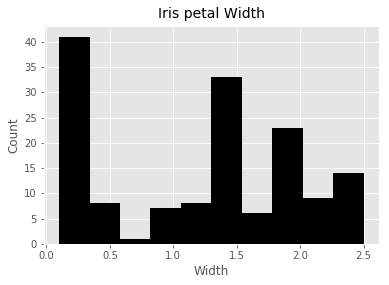

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(df['petal width'], color='black')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Width', fontsize=12)
plt.title('Iris petal Width', fontsize=14, y=1.01)

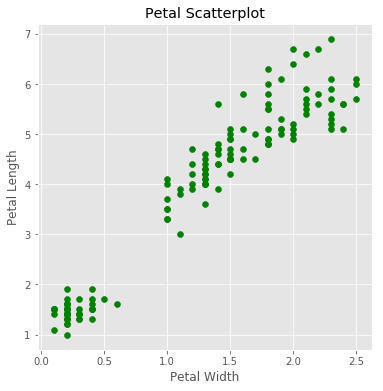

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(df['petal width'], df['petal length'], color='green')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Scatterplot')

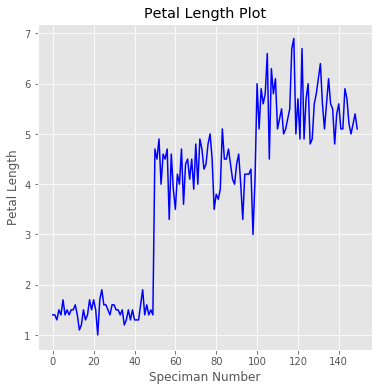

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(df['petal length'], color='blue')
ax.set_xlabel('Speciman Number')
ax.set_ylabel('Petal Length')
ax.set_title('Petal Length Plot')

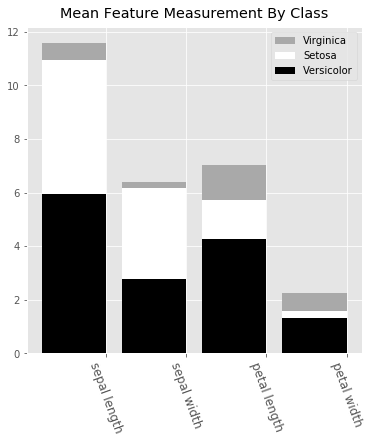

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
bar_width = .8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='darkgrey')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='white')
ax.bar(x, ver_y, bar_width, color='black')
ax.set_xticks(x + (bar_width / 2))
ax.set_xticklabels(labels, rotation=-70, fontsize=12)
ax.set_title('Mean Feature Measurement By Class', y=1.01)
ax.legend(['Virginica', 'Setosa', 'Versicolor'])

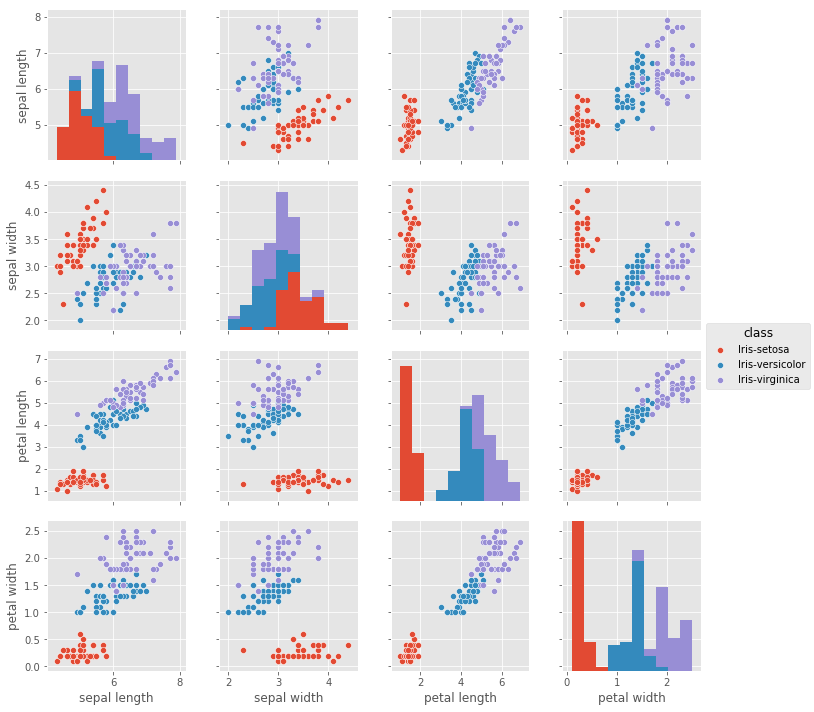

In [4]:
import seaborn as sns
sns.pairplot(df, hue='class')

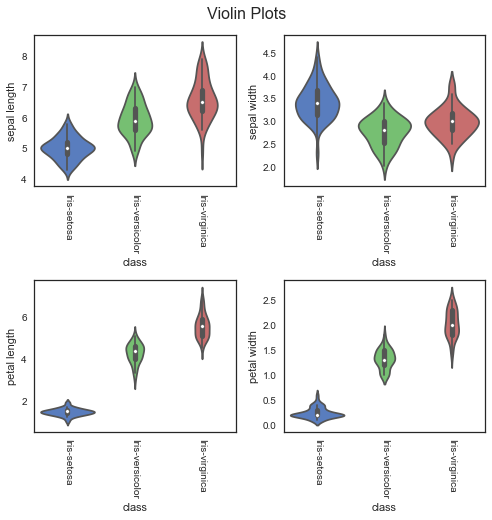

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
sns.set(style='white', palette='muted')
sns.violinplot(x=df['class'], y=df['sepal length'],ax=ax[0, 0])
sns.violinplot(x=df['class'], y=df['sepal width'], ax=ax[0, 1])
sns.violinplot(x=df['class'], y=df['petal length'], ax=ax[1, 0])
sns.violinplot(x=df['class'], y=df['petal width'], ax=ax[1, 1])
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
for i in ax.flat:
    plt.setp(i.get_xticklabels(), rotation=-90)
fig.tight_layout()

In [17]:
# df['class'] = df['class'].map({'Iris-setosa': 'SET', 'Iris-virginica': 'VIR', 'Iris-versicolor': 'VER'})

In [4]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >= 1.3 else 0)

In [5]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'], axis = 1)

In [6]:
df.applymap(lambda v: np.log(v) if isinstance(v, float) else v)

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,1.629241,1.252763,0.336472,-1.609438,Iris-setosa,0,-1.272966
1,1.589235,1.098612,0.336472,-1.609438,Iris-setosa,0,-1.272966
2,1.547563,1.163151,0.262364,-1.609438,Iris-setosa,0,-1.347074
3,1.526056,1.131402,0.405465,-1.609438,Iris-setosa,0,-1.203973
4,1.609438,1.280934,0.336472,-1.609438,Iris-setosa,0,-1.272966
5,1.686399,1.360977,0.530628,-0.916291,Iris-setosa,0,-0.385662
6,1.526056,1.223775,0.336472,-1.203973,Iris-setosa,0,-0.867501
7,1.609438,1.223775,0.405465,-1.609438,Iris-setosa,0,-1.203973
8,1.481605,1.064711,0.336472,-1.609438,Iris-setosa,0,-1.272966
9,1.589235,1.131402,0.405465,-2.302585,Iris-setosa,0,-1.897120


In [10]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,0.0,0.3628
Iris-versicolor,5.936,2.770,4.260,1.326,0.7,5.7204
Iris-virginica,6.588,2.974,5.552,2.026,1.0,11.2962


In [12]:
df.groupby('class').describe()

petal area                                                  \
                     count     mean       std   min     25%     50%    75%   
class                                                                        
Iris-setosa           50.0   0.3628  0.183248  0.11  0.2650   0.300   0.42   
Iris-versicolor       50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   
Iris-virginica        50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79   

                       petal length        ...  sepal width      wide petal  \
                   max        count   mean ...          75%  max      count   
class                                      ...                                
Iris-setosa       0.96         50.0  1.464 ...        3.675  4.4       50.0   
Iris-versicolor   8.64         50.0  4.260 ...        3.000  3.4       50.0   
Iris-virginica   15.87         50.0  5.552 ...        3.175  3.8       50.0   

                                                        
                mean      std  min  25%  50%  75%  max  
class                                                   
Iris-setosa      0.0  0.00000  0.0  0.0  0.0  0.0  0.0  
Iris-versicolor  0.7  0.46291  0.0  0.0  1.0  1.0  1.0  
Iris-virginica   1.0  0.00000  1.0  1.0  1.0  1.0  1.0  

[3 rows x 48 columns]

In [14]:
df.groupby('petal width')['class'].unique().to_frame()

,class
petal width,
0.1,[Iris-setosa]
0.2,[Iris-setosa]
0.3,[Iris-setosa]
0.4,[Iris-setosa]
0.5,[Iris-setosa]
0.6,[Iris-setosa]
1.0,[Iris-versicolor]
1.1,[Iris-versicolor]
1.2,[Iris-versicolor]


In [15]:
df.groupby('class')['petal width'].agg({'delta': lambda x: x.max() - x.min(), 'max': np.max, 'min': np.min})

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,delta,max,min
class,,,
Iris-setosa,0.5,0.6,0.1
Iris-versicolor,0.8,1.8,1.0
Iris-virginica,1.1,2.5,1.4


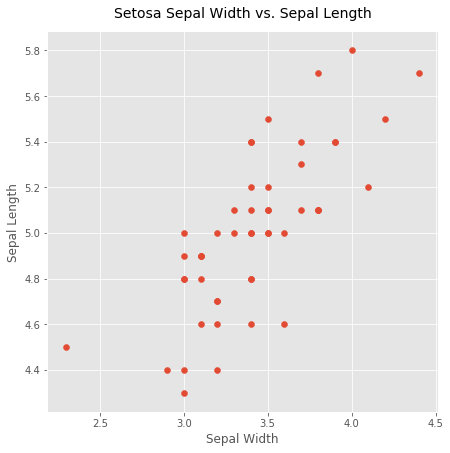

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [20]:
import statsmodels.api as sm

y = df['sepal length'][:50]
x = df['sepal width'][:50]
X =sm.add_constant(x)

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           4.75e-10
Time:                        10:36:01   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

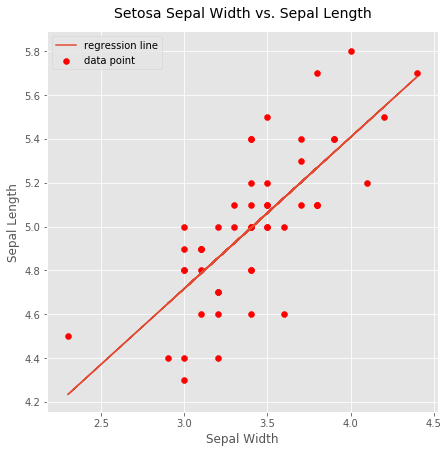

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split

clf = RandomForestClassifier(max_depth=5, n_estimators=10)
X = df.ix[:, :4]
y = df.ix[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])  
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,Iris-virginica,Iris-virginica,1
1,Iris-setosa,Iris-setosa,1
2,Iris-virginica,Iris-virginica,1
3,Iris-versicolor,Iris-versicolor,1
4,Iris-versicolor,Iris-versicolor,1
5,Iris-versicolor,Iris-versicolor,1
6,Iris-setosa,Iris-setosa,1
7,Iris-setosa,Iris-setosa,1
8,Iris-setosa,Iris-setosa,1
9,Iris-setosa,Iris-setosa,1


In [39]:
rf['correct'].sum() / rf['correct'].count()

0.97777777777777775

([<matplotlib.axis.XTick at 0x1135dacf8>,
 <a list of 4 Text xticklabel objects>)

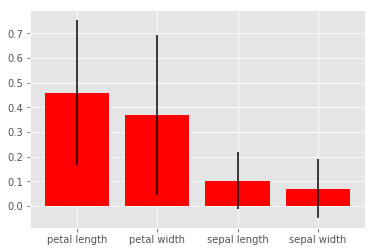

In [45]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]
plt.bar(range(len(f_importances)), imps, color='r', yerr=errs, align='center')
plt.xticks(range(len(f_importances)), labels)

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.ix[:, :4]
y = np.array(df.ix[:, 4]).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,Iris-virginica,Iris-versicolor,0
1,Iris-setosa,Iris-setosa,1
2,Iris-setosa,Iris-setosa,1
3,Iris-setosa,Iris-setosa,1
4,Iris-versicolor,Iris-versicolor,1
5,Iris-versicolor,Iris-versicolor,1
6,Iris-virginica,Iris-virginica,1
7,Iris-setosa,Iris-setosa,1
8,Iris-virginica,Iris-virginica,1
9,Iris-setosa,Iris-setosa,1


In [53]:
rf['correct'].sum() / rf['correct'].count()

0.93333333333333335